In [1]:
import scycle as cc
import scanpy as sc
import numpy as np

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)

In [2]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_9 = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.prep_pooling(adata_9, filter_cells=True, max_counts=50000)
cc.tl.dimensionality_reduction(adata_9, method="ica")
cc.tl.enrich_components(adata_9, verbose=True)

Preparing embedding...
3862 samples pass the count filter
4547  samples pass the mt filter
Samples selected 3806
Embedding for pooling...
Pooling 3806 samples...
-- Dimensionality reduction using ICA...
-- Done
G1/S  score: 7.239308
G2/M+ score: 10.071171
G2/M- score: 6.125373
HIST  score: 17.308605
--- Selected components:
G1/S: 1 (score=7.239308)
G2/M: 11 (score=10.071171)
G2/M-: 14 (score=6.125373)
Histones: 3 (score=17.308605)


In [3]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata_10 = sc.read_h5ad(DATA_PATH + 'CHLA10.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
cc.pp.prep_pooling(adata_10, filter_cells=True, max_counts=50000)
cc.tl.dimensionality_reduction(adata_10, method="ica")
cc.tl.enrich_components(adata_10, verbose=True)

Preparing embedding...
3476 samples pass the count filter
4534  samples pass the mt filter
Samples selected 3464
Embedding for pooling...
Pooling 3464 samples...
-- Dimensionality reduction using ICA...
-- Done
G1/S  score: 8.086135
G2/M+ score: 10.487279
G2/M- score: 9.380926
HIST  score: 16.733161
--- Selected components:
G1/S: 1 (score=8.086135)
G2/M: 2 (score=10.487279)
G2/M-: 6 (score=9.380926)
Histones: 3 (score=16.733161)


In [4]:
cc.tl.principal_circle(adata_9)
cc.tl.celldiv_moment(adata_9)
cc.tl.remap_nodes(adata_9)
cc.tl.pseudotime(adata_9)
cc.tl.curvature(adata_9)

Suggested moment of cell division: [8 9]
Direction of cell cycle: 1
Remapping edges using [8 9] ...
Calculating pseudotimes for each cell...


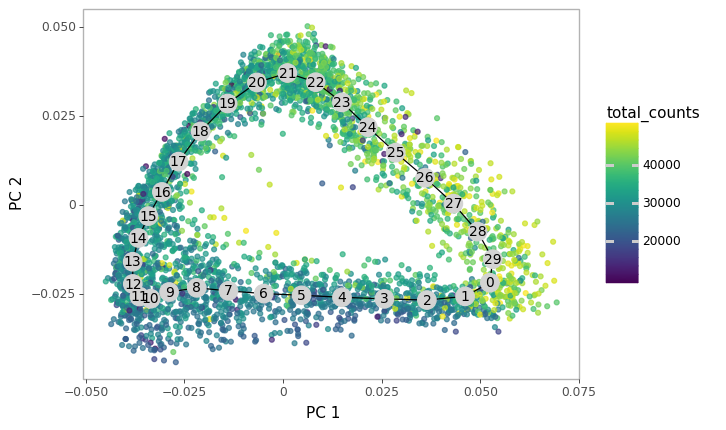

<ggplot: (8773917700804)>

In [5]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [6]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

Suggested moment of cell division: [12 13]
Direction of cell cycle: 1
Remapping edges using [12 13] ...
Calculating pseudotimes for each cell...


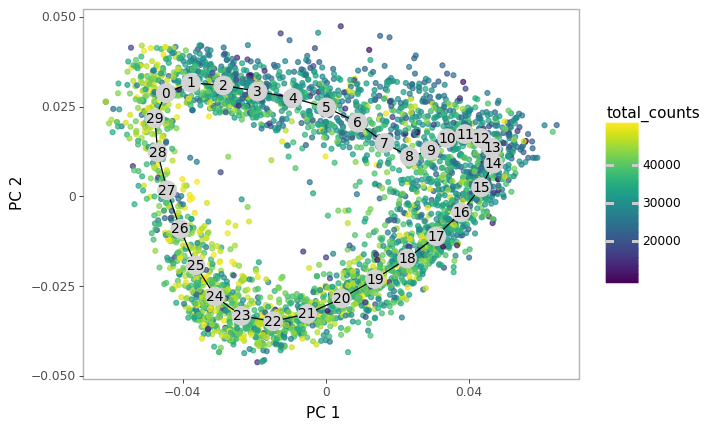

<ggplot: (8773926291664)>

In [7]:
cc.pl.scatter_projection(adata_10, trajectory=True)

In [8]:
cc.tl.integration(adata_10, adata_9, verbose=True)

-- Automatically detecting cell-cycle components...
-- Integrating datasets...
> Selecting common genes...
> 9227 genes selected.
> Slicing matrices...
-- Done


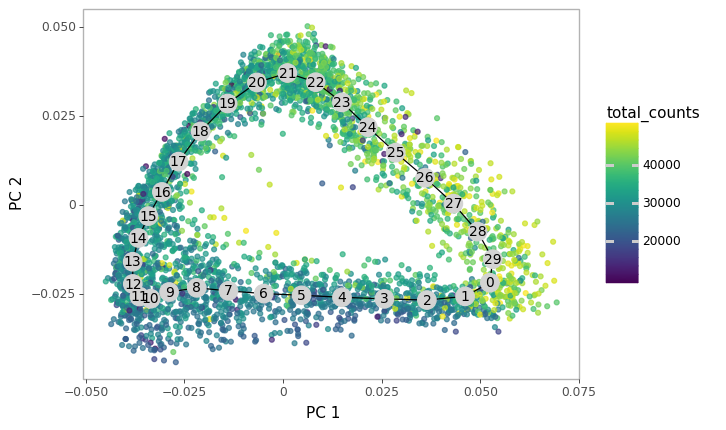

<ggplot: (8773943739444)>

In [9]:
cc.pl.scatter_projection(adata_9, trajectory=True)

In [10]:
cc.tl.principal_circle(adata_10)
cc.tl.celldiv_moment(adata_10)
cc.tl.remap_nodes(adata_10)
cc.tl.pseudotime(adata_10)
cc.tl.curvature(adata_10)

Suggested moment of cell division: [6 7]
Direction of cell cycle: -1
Remapping edges using [6 7] ...
Calculating pseudotimes for each cell...


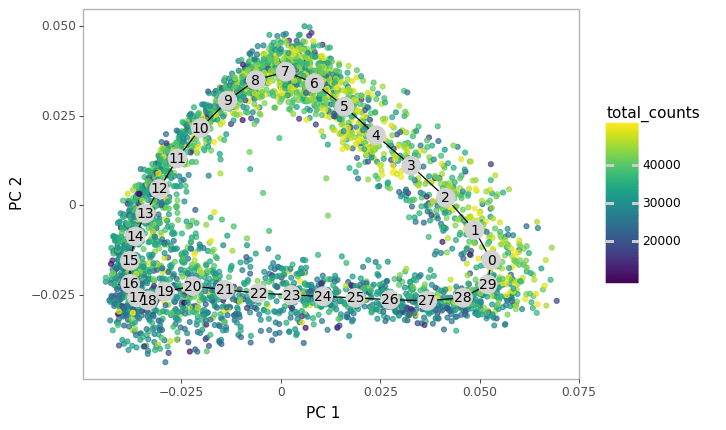

<ggplot: (8773670603560)>

In [11]:
cc.pl.scatter_projection(adata_10, trajectory=True)